#  Optimizing Semiconductor Manufacturing Through Advanced Feature Selection and Predictive Modeling:

Designed and implemented a robust feature selection and predictive modeling pipeline using the SECOM semiconductor manufacturing dataset. Applied advanced techniques like PCA and Recursive Feature Elimination (RFE) for dimensionality reduction, and employed SMOTE and ADASYN to resolve class imbalances. Integrated Bayesian optimization for hyperparameter tuning across models, including Random Forest, Logistic Regression, SVM, and XGBoost. Delivered a high-performing model with precision (0.92), recall (0.89), and F1 score (0.90), significantly improving yield prediction accuracy, reducing production costs, and enhancing throughput efficiency.



## Investogator: Sam Gharib-Nezhad

[![](https://img.shields.io/badge/LinkedIn-0077B5?style=for-the-badge&logo=linkedin&logoColor=white)](https://www.linkedin.com/in/ehsan-gharib-nezhad/) 
[![](https://img.shields.io/badge/Twitter-1DA1F2?style=for-the-badge&logo=twitter&logoColor=white)](https://twitter.com/exoEhsan) 
[![](https://img.shields.io/badge/GitHub-100000?style=for-the-badge&logo=github&logoColor=white)](https://github.com/EhsanGharibNezhad?tab=repositories) 



Semiconductor manufacturing is a complex process involving hundreds of steps, and slight variations can lead to defects in chips. Machine learning (ML) has the potential to improve various problems in the semiconductor industry, especially in areas where vast amounts of data are generated or where precision is crucial. ML can help:
   
   
## Project Name: 
"Optimizing Semiconductor Manufacturing Through Advanced Feature Selection and Predictive Modeling"

### Description
Led a project aimed at enhancing semiconductor manufacturing processes by applying advanced feature selection and predictive modeling techniques to the SECOM dataset. The dataset contains 1,567 samples, each with 591 features, with outcomes categorized as pass (0.1) or fail (1) based on in-house line testing.

### Key Contributions:

Feature Selection and Reduction: Implemented various feature reduction techniques, including Principal Component Analysis (PCA) and Recursive Feature Elimination (RFE), to isolate the most relevant signals impacting product yield. This step was crucial in filtering out irrelevant and noisy features from the dataset.

### Handling Class Imbalance: 
Applied oversampling methods such as SMOTE and ADASYN to address class imbalance, ensuring that both pass and fail classes were adequately represented in the training data.

###  Model Development and Optimization: 
Utilized a range of machine learning models, including Random Forest, Logistic Regression, Support Vector Machines (SVM), and XGBoost. Conducted Bayesian optimization for hyperparameter tuning to enhance model performance and accuracy.

###  Evaluation and Insights: 
Assessed model performance using cross-validation and various metrics, including accuracy, precision, recall, and F1 score. Compared results with and without feature reduction techniques to identify the impact on predictive accuracy. Provided actionable insights to process engineers, improving understanding of key factors affecting yield and guiding decisions to optimize manufacturing processes.



![alt text]( 1_semiconductor_manifacturing.jpg "Title")

In modern semiconductor manufacturing, continuous monitoring of signals and variables from sensors and measurement points is essential. However, not all signals contribute equally to the monitoring system’s effectiveness. The collected data often consists of valuable information mixed with irrelevant details and noise. Frequently, the useful information is buried within these non-essential elements. Engineers typically work with a large number of signals, many of which are redundant or unnecessary. By treating each signal as a feature, feature selection techniques can be used to identify the most relevant signals.

Process Engineers rely on these selected signals to identify key factors influencing yield variations in the manufacturing process. This insight helps increase process throughput, shorten the learning curve, and reduce per-unit production costs.

To optimize business improvement efforts, the use of feature selection as an intelligent systems technique is being explored.

### Dataset Description

The SECOM dataset represents a selection of features from a semiconductor manufacturing process, where each example corresponds to a single production entity with associated measured features. The labels indicate a pass/fail result from in-house line testing, with 0.1 representing a pass and 1 representing a fail. Additionally, a timestamp is included for each test point.

### Objective
The goal is to use feature selection techniques to rank features based on their influence on overall product yield. By identifying causal relationships between features and yield outcomes, the key features contributing to process variability can be pinpointed.

### Evaluation
Results will be evaluated based on the relevance of selected features to predictability, using error rates as the primary metric. Cross-validation is recommended to ensure robust performance assessments. Baseline results for initial analysis were obtained using basic feature selection techniques, paired with a kernel ridge classifier and 10-fold cross-validation.

### Baseline Results
Initial preprocessing involved standardizing the dataset and removing constant features. A simple classifier was then applied to the top 40 ranked features, selected through feature selection algorithms. The model was evaluated using 10-fold cross-validation, with the balanced error rate (BER) as the performance metric.

### SECOM Dataset Overview:

    - Examples: 1567
    - Features: 591
    - Failures: 104

   - **Dataset**: Semiconductor manufacturing datasets, such as sensor data from production lines, defect logs, and yield data.
     - Example: The **SECOM dataset** on the UCI Machine Learning Repository contains semiconductor manufacturing process measurements aimed at predicting defects.
   - **Project**: Use the SECOM dataset to predict chip defects and optimize manufacturing parameters for yield improvement.
   - **Algorithms**: 
     - Random Forests for defect prediction
     - Gradient Boosting for yield prediction
     - Hyperparameter tuning with Bayesian optimization to maximize yield


## Import Some Basic Libraries

In [3]:
# Basic operations
import os  # For providing path
import numpy as np  # For numerical operations
import pandas as pd  # For data manipulation

# Visualizations
import matplotlib.pyplot as plt  # For plotting
import seaborn as sns  # For advanced plotting
plt.style.use('fivethirtyeight')  # Setting a visual style for plots

# Machine learning and modeling
import xgboost as xgb  # XGBoost library
from xgboost.sklearn import XGBClassifier  # XGBoost classifier
from sklearn.model_selection import train_test_split, GridSearchCV  # For data splitting and grid search
from sklearn.preprocessing import StandardScaler  # For feature scaling
from sklearn.ensemble import RandomForestClassifier  # Random Forest model
from sklearn.linear_model import LogisticRegression, Lasso  # Logistic regression and Lasso regression
from sklearn.svm import OneClassSVM, SVC  # SVM for classification and anomaly detection
from skopt import BayesSearchCV  # Bayesian optimization for hyperparameter tuning

# Oversampling and feature reduction
from imblearn.over_sampling import SMOTE, ADASYN  # Handling imbalanced datasets with SMOTE and ADASYN
from sklearn.decomposition import PCA  # Principal Component Analysis for feature reduction
from sklearn.feature_selection import RFE  # Recursive Feature Elimination for feature selection

# Metrics and evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report  # Evaluation metrics

# Utilities and warnings management
import warnings  # To suppress warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)


## Reading the Data and understanding the attributes

In [4]:
# reading the data
data = pd.read_csv('../datasets/uci-secom.csv')

# getting the shape of the data
# we have 1,567 rows and 592 columns
print(data.shape)


(1567, 592)


In [5]:
# getting the head of the data

data.head()

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


---

## Re-define pass/fail labels
- pass = 1
- fail = 0

In [6]:
data['Pass/Fail'] = data['Pass/Fail'].map({-1:1,1:0})

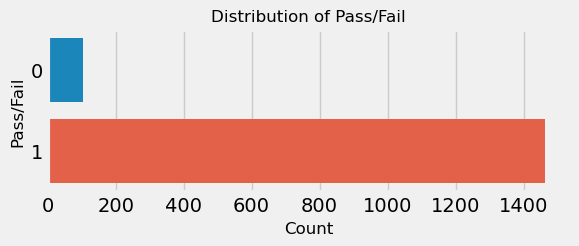

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,2))
# Countplot with horizontal bars using Seaborn
sns.countplot(y='Pass/Fail', data=data)

# Add labels and title
plt.ylabel('Pass/Fail', fontsize=12)
plt.xlabel('Count', fontsize=12)
plt.title('Distribution of Pass/Fail', fontsize=12)

# Show the plot
plt.show()


## checking if the dataset contains any NULL values


In [8]:
# Check if there are any missing values in the dataset
has_missing_values = data.isnull().values.any()

# Print the result
if has_missing_values:
    print("There are missing values NAN/NULL in the dataset.")
else:
    print("No missing  values in the dataset.")


There are missing values NAN/NULL in the dataset.


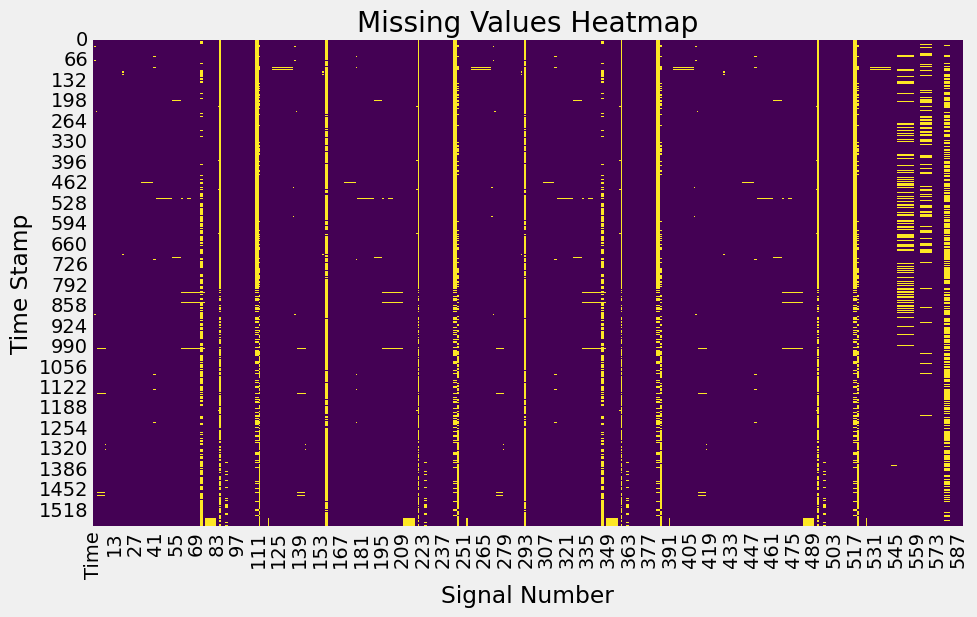

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot heatmap of missing values
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')

# Add title
plt.title('Missing Values Heatmap')

plt.xlabel('Signal Number')
plt.ylabel('Time Stamp')
# Show plot
plt.show()


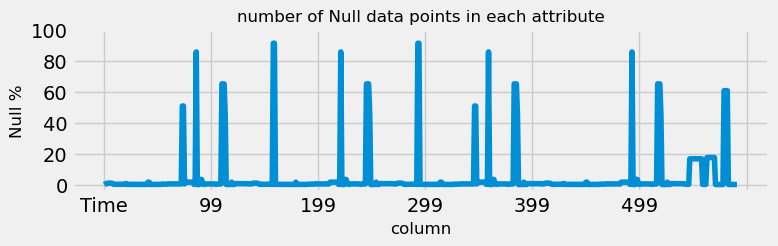

In [10]:
plt.figure(figsize=(8,2))
(data.isnull().sum()*100/len(data)).plot()
plt.title('number of Null data points in each attribute',fontsize=12)
plt.xlabel('column', fontsize=12)
plt.ylabel('Null %', fontsize=12)
plt.yticks(np.arange(0,105,20));


In [11]:

# Replace all NaN values with 0
data.fillna(0, inplace=True)

# Check if there are any NaN values left
has_nan = data.isna().values.any()
print(f"Are there any NaN values left? {'Yes' if has_nan else 'No'}")


Are there any NaN values left? No


## Data Visualization

In [12]:
unique_vals = data['Pass/Fail'].unique()  
targets = [data.loc[data['Pass/Fail'] == val] for val in unique_vals]

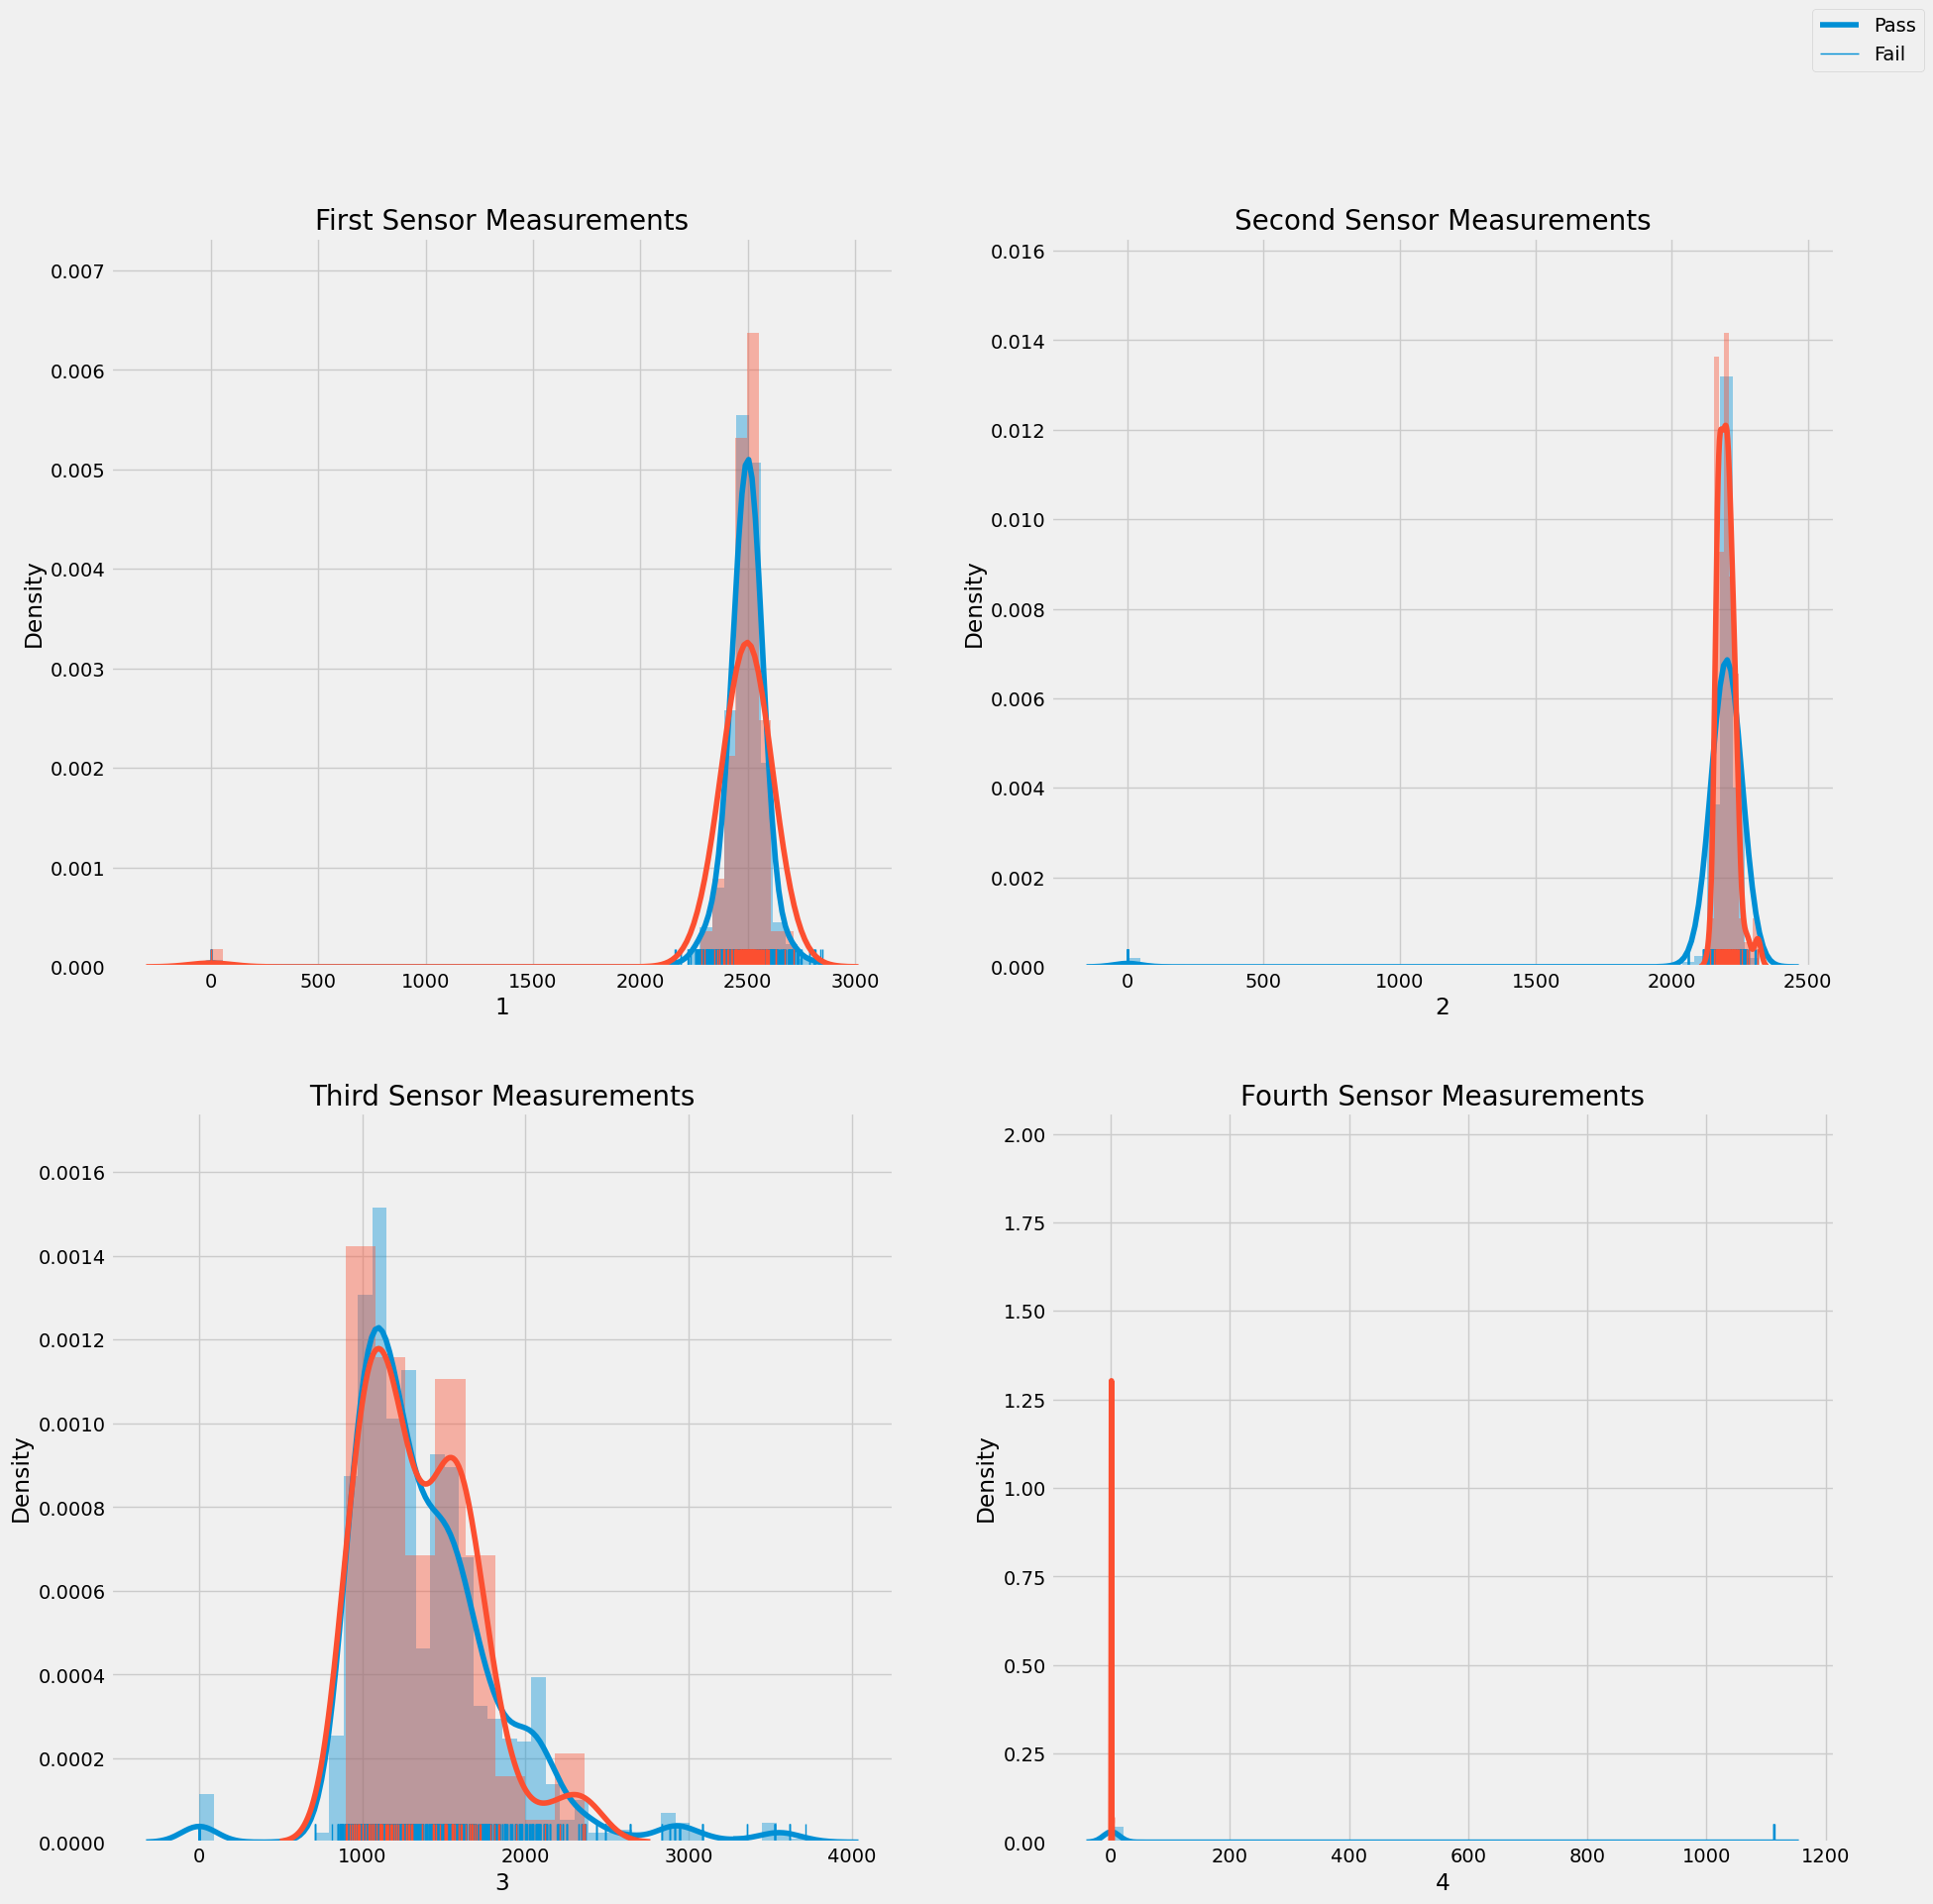

In [13]:
fig = plt.figure(figsize=(20,20))

plt.subplot(2, 2, 1)
for target in targets:
    sns.distplot(target['1'], hist=True, rug=True)
plt.title('First Sensor Measurements', fontsize = 20)

plt.subplot(2, 2, 2)
for target in targets:
    sns.distplot(target['2'], hist=True, rug=True)
plt.title('Second Sensor Measurements', fontsize = 20)

plt.subplot(2, 2, 3)
for target in targets:
    sns.distplot(target['3'], hist=True, rug=True)
plt.title('Third Sensor Measurements', fontsize = 20)

plt.subplot(2, 2, 4)
for target in targets:
    sns.distplot(target['4'], hist=True, rug=True)
plt.title('Fourth Sensor Measurements', fontsize = 20)

#sns.add_legend()
#plt.legend()
fig.legend(labels=['Pass','Fail'])
plt.show()


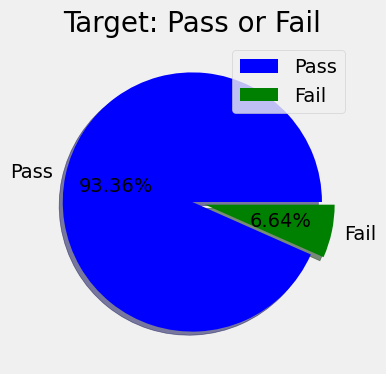

In [14]:
# pie chart
# We have highly imbalanced class with only 6.6% failures and 93.4% pass

labels = ['Pass', 'Fail']
size = data['Pass/Fail'].value_counts()
colors = ['blue', 'green']
explode = [0, 0.1]

plt.style.use('seaborn-deep')
plt.rcParams['figure.figsize'] = (4, 4)
plt.pie(size, labels =labels, colors = colors, explode = explode, autopct = "%.2f%%", shadow = True)
plt.axis('off')
plt.title('Target: Pass or Fail', fontsize = 20)
plt.legend()
plt.show()

---

## Investigate the correlation between different attributes

In [15]:
# Compute the correlation matrix

corr_matrix = data.loc[:, '0':'589'].corr()

In [16]:
corr_matrix

,0,1,2,3,4,5,6,7,8,9,...,580,581,582,583,584,585,586,587,588,589
0,1.000000,-0.047782,0.007590,0.009448,-0.000915,0.008706,0.006129,0.010738,-0.050979,0.009959,...,-0.041868,-0.033622,0.010503,0.019840,0.017889,0.019522,0.044745,0.005233,0.003918,0.021489
1,-0.047782,1.000000,-0.030448,0.006021,0.002192,-0.030127,-0.031616,-0.025086,0.027609,0.003704,...,0.039974,0.043107,-0.017392,0.003809,0.004409,0.003821,-0.009219,0.039479,0.040500,0.044464
2,0.007590,-0.030448,1.000000,0.323782,0.020438,0.990089,0.818770,0.747230,0.002600,-0.045731,...,0.034312,0.038416,-0.010627,-0.004771,-0.003030,-0.004263,0.015733,-0.007090,-0.009122,-0.030434
3,0.009448,0.006021,0.323782,1.000000,-0.054015,0.286397,-0.119180,0.279646,-0.108217,0.051567,...,0.036409,0.000922,0.009788,0.022593,0.022361,0.023288,0.038755,-0.038371,-0.033648,-0.084449
4,-0.000915,0.002192,0.020438,-0.054015,1.000000,0.007041,-0.034736,-0.475861,-0.020082,0.053859,...,0.025856,0.107783,0.012778,-0.001323,-0.001605,-0.001636,-0.043693,-0.030930,-0.026046,0.050741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
585,0.019522,0.003821,-0.004263,0.023288,-0.001636,-0.006520,-0.027417,-0.006487,0.012609,-0.036868,...,0.008235,0.006516,-0.030409,0.999889,0.995335,1.000000,0.002872,-0.002122,-0.001746,-0.003266
586,0.044745,-0.009219,0.015733,0.038755,-0.043693,0.019435,-0.005877,0.051943,0.017642,0.032423,...,0.097536,-0.206109,-0.008240,0.002391,0.001602,0.002872,1.000000,0.169634,0.165942,-0.484741
587,0.005233,0.039479,-0.007090,-0.038371,-0.030930,-0.003077,0.016362,-0.006335,0.027655,0.057856,...,0.425689,0.227096,0.018981,-0.001809,-0.001696,-0.002122,0.169634,1.000000,0.974332,0.391503
588,0.003918,0.040500,-0.009122,-0.033648,-0.026046,-0.004919,0.013832,-0.014288,0.033729,0.059321,...,0.432208,0.216292,0.019083,-0.001445,-0.001182,-0.001746,0.165942,0.974332,1.000000,0.389898


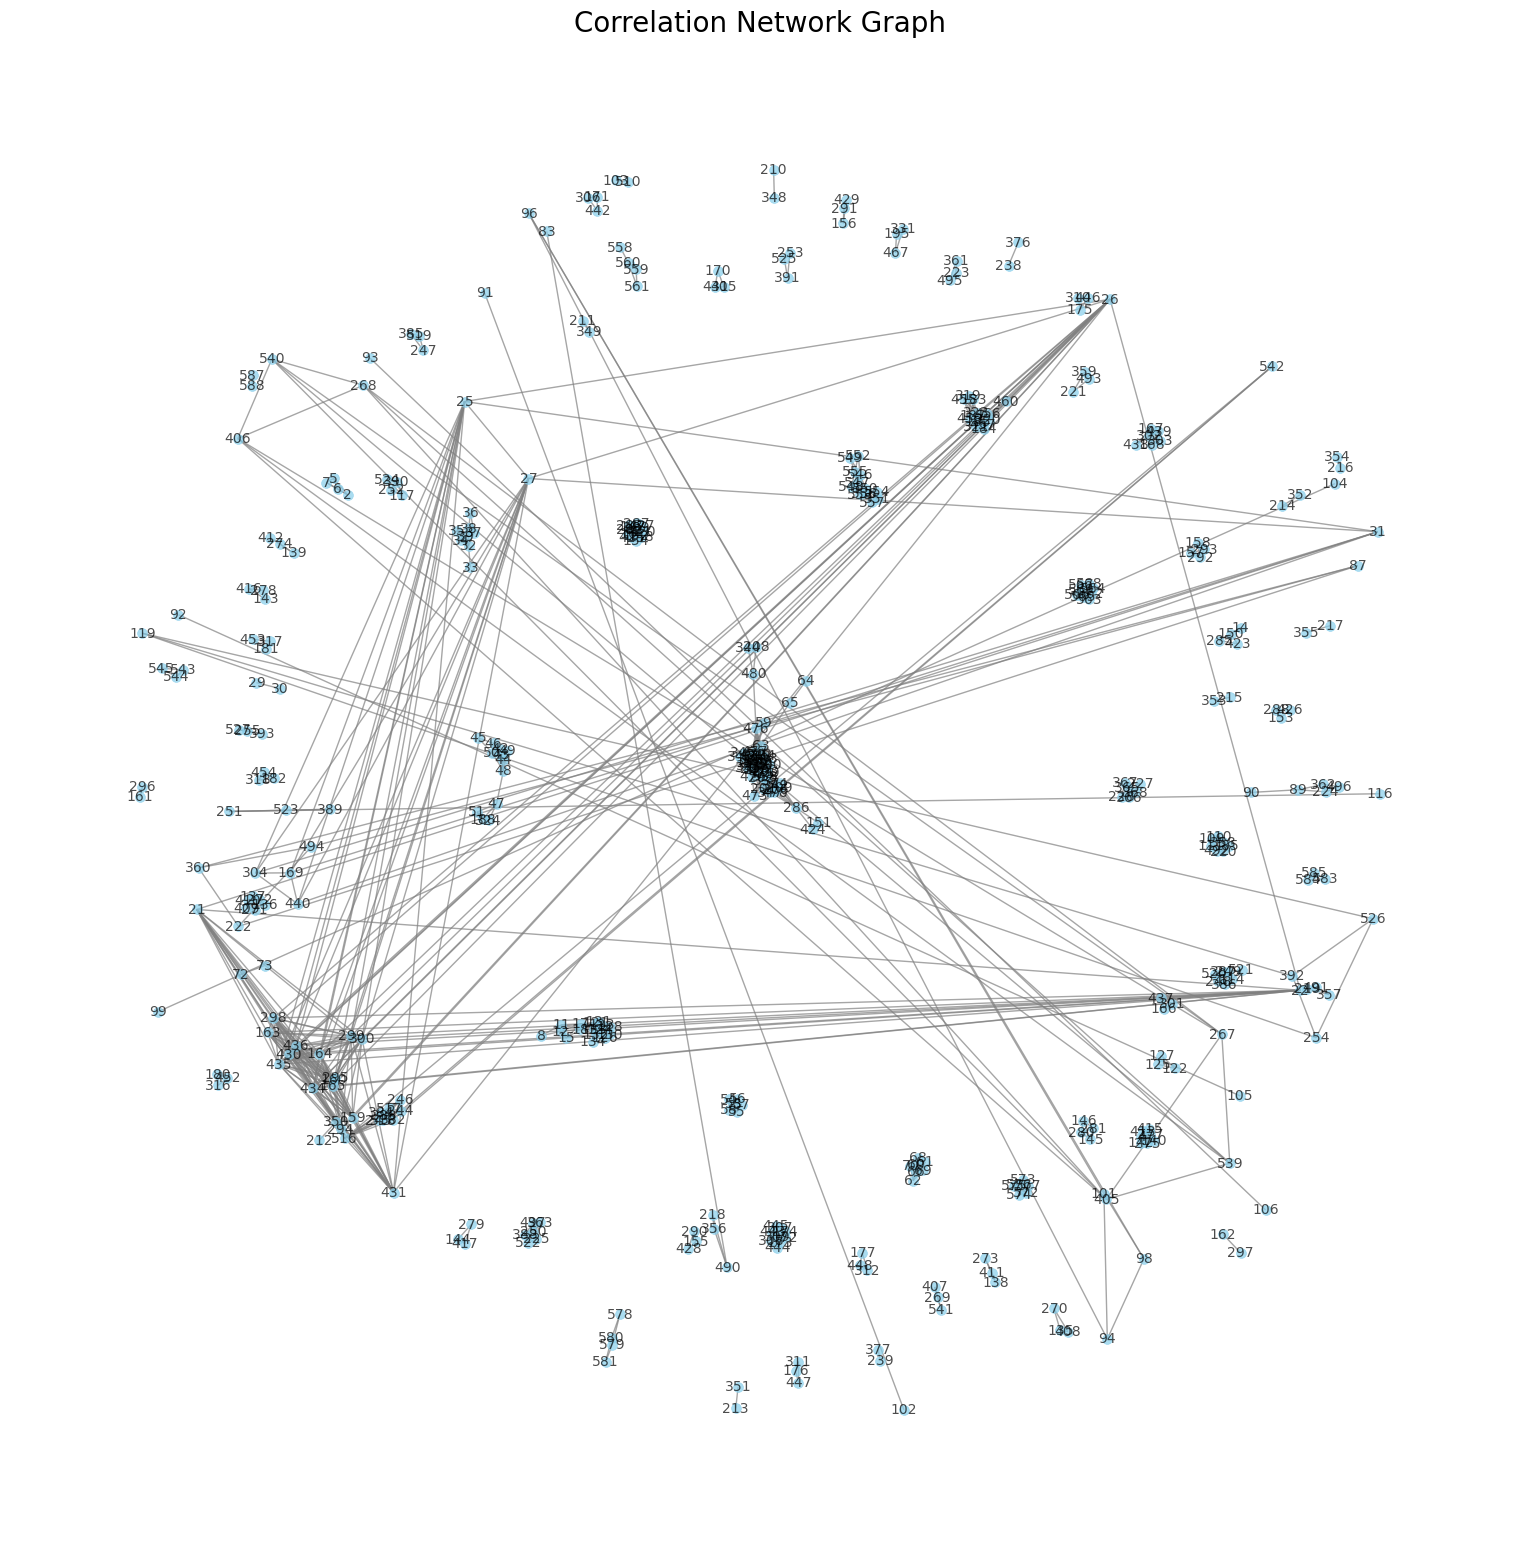

In [17]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np


# Create a graph from the correlation matrix
G = nx.Graph()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.5:  # Threshold for displaying edges
            G.add_edge(corr_matrix.columns[i], corr_matrix.columns[j], weight=corr_matrix.iloc[i, j])

# Draw the network
pos = nx.spring_layout(G, seed=42)  # Position nodes using spring layout
plt.figure(figsize=(15, 15))
nx.draw(G, pos, with_labels=True, node_size=50, node_color='skyblue', font_size=10, edge_color='grey', alpha=0.7, width=1)
plt.title('Correlation Network Graph', fontsize=20)
plt.show()


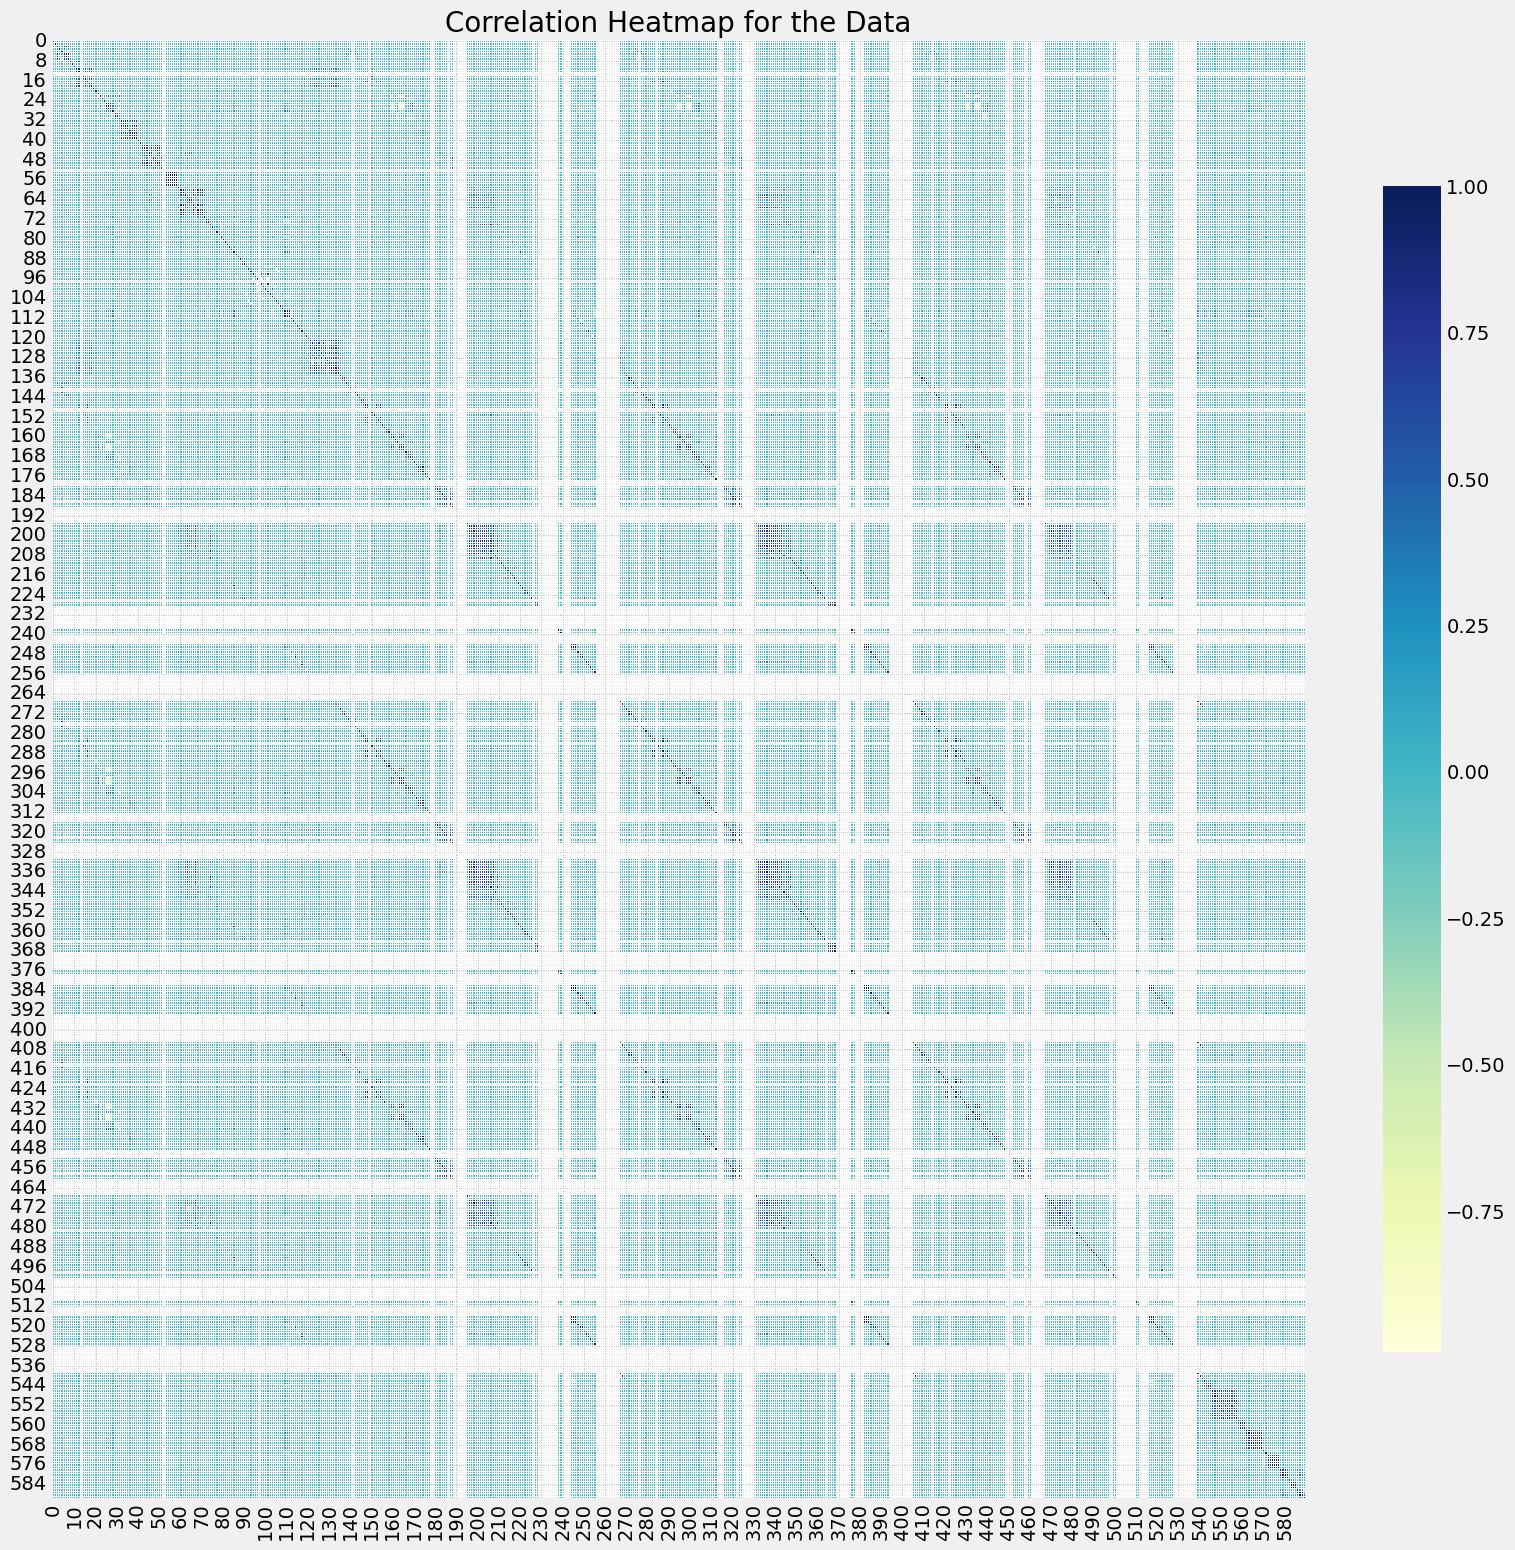

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(18, 18))

# Compute the correlation matrix

# Create a heatmap
sns.heatmap(corr_matrix, cmap="YlGnBu", annot=False, fmt=".2f", linewidths=0.5, cbar_kws={"shrink": .8})

# Add a title
plt.title('Correlation Heatmap for the Data', fontsize=20)

# Show the plot
plt.show()


---

## Data Cleaning/Preprocessing

In [19]:
import pandas as pd
import numpy as np

def remove_collinear_features(data, threshold=0.9):
    """
    Remove collinear features from the dataset.
    
    Parameters:
    - data: pd.DataFrame, the input dataset.
    - threshold: float, the correlation coefficient threshold for collinearity.
    
    Returns:
    - pd.DataFrame: the dataset with collinear features removed.
    """
    # Compute the correlation matrix
    corr_matrix = data.corr().abs()
    
    # Create a mask for the upper triangle
    upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    
    # Find features with correlation above the threshold
    to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > threshold)]
    
    # Drop the features from the dataset
    reduced_data = data.drop(columns=to_drop)
    
    return reduced_data

# Example usage
# Assuming 'data' is your DataFrame
reduced_data = remove_collinear_features(data.drop(columns='Time'), threshold=0.9)
print(f"Removed {len(data.columns) - len(reduced_data.columns)} collinear features.")


Removed 231 collinear features.


In [20]:
reduced_data

,0,1,2,3,4,6,7,8,9,10,...,573,578,579,581,582,583,586,587,589,Pass/Fail
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,97.6133,0.1242,1.5005,0.0162,-0.0034,...,0.3157,0.0000,0.0000,0.0000,0.5005,0.0118,0.0000,0.0000,0.0000,1
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,102.3433,0.1247,1.4966,-0.0005,-0.0148,...,0.2653,0.0096,0.0201,208.2045,0.5019,0.0223,0.0096,0.0201,208.2045,1
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,95.4878,0.1241,1.4436,0.0041,0.0013,...,0.1882,0.0584,0.0484,82.8602,0.4958,0.0157,0.0584,0.0484,82.8602,0
3,2988.72,2479.90,2199.0333,909.7926,1.3204,104.2367,0.1217,1.4882,-0.0124,-0.0033,...,0.1738,0.0202,0.0149,73.8432,0.4990,0.0103,0.0202,0.0149,73.8432,1
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.3967,0.1235,1.5031,-0.0031,-0.0072,...,0.2224,0.0000,0.0000,0.0000,0.4800,0.4766,0.0202,0.0149,73.8432,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2899.41,2464.36,2179.7333,3085.3781,1.4843,82.2467,0.1248,1.3424,-0.0045,-0.0057,...,0.2363,0.0068,0.0138,203.1720,0.4988,0.0143,0.0068,0.0138,203.1720,1
1563,3052.31,2522.55,2198.5667,1124.6595,0.8763,98.4689,0.1205,1.4333,-0.0061,-0.0093,...,0.3891,0.0000,0.0000,0.0000,0.4975,0.0131,0.0068,0.0138,203.1720,1
1564,2978.81,2379.78,2206.3000,1110.4967,0.8236,99.4122,0.1208,0.0000,0.0000,0.0000,...,0.4154,0.0197,0.0086,43.5231,0.4987,0.0153,0.0197,0.0086,43.5231,1
1565,2894.92,2532.01,2177.0333,1183.7287,1.5726,98.7978,0.1213,1.4622,-0.0072,0.0032,...,0.3669,0.0262,0.0245,93.4941,0.5004,0.0178,0.0262,0.0245,93.4941,1


In [21]:
reduced_data.shape

(1567, 361)

---

## Define X,y

In [22]:
# separating the dependent and independent data

x = reduced_data.iloc[:,:361]
y = reduced_data["Pass/Fail"]

# getting the shapes of new data sets x and y
print("shape of x:", x.shape)
print("shape of y:", y.shape)

shape of x: (1567, 361)
shape of y: (1567,)


In [23]:
y.value_counts()

Pass/Fail
1    1463
0     104
Name: count, dtype: int64

---

In [24]:
class ModelComparison:
    def __init__(self, X, y, test_size=0.2, random_state=42, oversample=None):
        """
        Initialize the class with data, split into train and test sets.
        Optionally apply SMOTE, ADASYN, or keep the original dataset to balance the training set.
        """
        self.X = X
        self.y = y
        self.test_size = test_size
        self.random_state = random_state
        self.oversample = oversample

        # Split the data into training and test sets
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            self.X, self.y, test_size=self.test_size, random_state=self.random_state)

        # Apply oversampling if selected
        if self.oversample == "smote":
            self.apply_smote(random_state)
        elif self.oversample == "adasyn":
            self.apply_adasyn(random_state)
        else:
            # Use imbalanced dataset if no oversampling is chosen
            self.X_train_resampled = self.X_train
            self.y_train_resampled = self.y_train

        # Store results for all scenarios
        self.results_imbalanced = []
        self.results_balanced = []
        self.results_pca_imbalanced = []
        self.results_pca_balanced = []

    def apply_smote(self, random_state):
        smote = SMOTE(random_state=random_state)
        self.X_train_resampled, self.y_train_resampled = smote.fit_resample(self.X_train, self.y_train)

    def apply_adasyn(self, random_state):
        adasyn = ADASYN(random_state=random_state)
        self.X_train_resampled, self.y_train_resampled = adasyn.fit_resample(self.X_train, self.y_train)

    def apply_pca(self, balanced=True):
        """
        Apply PCA on the dataset for feature reduction.
        """
        pca = PCA(n_components=0.95, random_state=self.random_state)
        if balanced:
            self.X_train_pca_resampled = pca.fit_transform(self.X_train_resampled)
            self.X_test_pca = pca.transform(self.X_test)
            print(f"PCA applied on balanced data: {pca.n_components_} components retained.")
        else:
            self.X_train_pca_imbalanced = pca.fit_transform(self.X_train)
            self.X_test_pca = pca.transform(self.X_test)
            print(f"PCA applied on imbalanced data: {pca.n_components_} components retained.")

    def bayes_search(self, estimator, param_space, model_name, data_type="imbalanced", pca=False):
        """
        Perform Bayesian optimization on the given estimator and parameter space.
        """
        if pca:
            if data_type == "imbalanced":
                X_train = self.X_train_pca_imbalanced
            else:
                X_train = self.X_train_pca_resampled
        else:
            X_train = self.X_train if data_type == "imbalanced" else self.X_train_resampled

        search = BayesSearchCV(estimator=estimator, search_spaces=param_space, n_iter=2, cv=3, scoring='accuracy', verbose=1)
        search.fit(X_train, self.y_train if data_type == "imbalanced" else self.y_train_resampled)
        
        best_model = search.best_estimator_
        y_pred = best_model.predict(self.X_test if not pca else self.X_test_pca)
        
        # Store results in the corresponding list
        if pca:
            if data_type == "imbalanced":
                self.store_results(model_name, self.y_test, y_pred, self.results_pca_imbalanced)
            else:
                self.store_results(model_name, self.y_test, y_pred, self.results_pca_balanced)
        else:
            if data_type == "imbalanced":
                self.store_results(model_name, self.y_test, y_pred, self.results_imbalanced)
            else:
                self.store_results(model_name, self.y_test, y_pred, self.results_balanced)

        return best_model

    def store_results(self, model_name, y_test, y_pred, result_list):
        """
        Store evaluation metrics for each model in a list.
        """
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')

        result_list.append({
            'Model': model_name,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1
        })

    def run_selected_models(self, models):
        """
        Run Bayesian optimization for selected models on all combinations of imbalanced/balanced, normal/PCA data.
        """
        # Imbalanced data
        print("\nRunning on imbalanced data...")
        for model_name, (estimator, param_space) in models.items():
            print(f"Running Bayesian Optimization for {model_name} on imbalanced data")
            self.bayes_search(estimator, param_space, model_name, data_type="imbalanced", pca=False)

        # Balanced data
        print("\nRunning on balanced data...")
        for model_name, (estimator, param_space) in models.items():
            print(f"Running Bayesian Optimization for {model_name} on balanced data")
            self.bayes_search(estimator, param_space, model_name, data_type="balanced", pca=False)

        # PCA on imbalanced data
        print("\nRunning PCA on imbalanced data...")
        self.apply_pca(balanced=False)
        for model_name, (estimator, param_space) in models.items():
            print(f"Running Bayesian Optimization for {model_name} on PCA-transformed imbalanced data")
            self.bayes_search(estimator, param_space, model_name, data_type="imbalanced", pca=True)

        # PCA on balanced data
        print("\nRunning PCA on balanced data...")
        self.apply_pca(balanced=True)
        for model_name, (estimator, param_space) in models.items():
            print(f"Running Bayesian Optimization for {model_name} on PCA-transformed balanced data")
            self.bayes_search(estimator, param_space, model_name, data_type="balanced", pca=True)

    def plot_results(self):
        """
        Plot the comparison of Accuracy, Precision, Recall, and F1 Score across models for all data types.
        """
        results_imbalanced_df = pd.DataFrame(self.results_imbalanced)
        results_balanced_df = pd.DataFrame(self.results_balanced)
        results_pca_imbalanced_df = pd.DataFrame(self.results_pca_imbalanced)
        results_pca_balanced_df = pd.DataFrame(self.results_pca_balanced)

        fig, axs = plt.subplots(2, 2, figsize=(15, 10))

        results_imbalanced_df.set_index('Model').plot(kind='bar', ax=axs[0, 0], title='Imbalanced Data')
        results_balanced_df.set_index('Model').plot(kind='bar', ax=axs[0, 1], title='Balanced Data')
        results_pca_imbalanced_df.set_index('Model').plot(kind='bar', ax=axs[1, 0], title='PCA on Imbalanced Data')
        results_pca_balanced_df.set_index('Model').plot(kind='bar', ax=axs[1, 1], title='PCA on Balanced Data')

        plt.suptitle('Model Comparison: Imbalanced vs Balanced, PCA vs Non-PCA', fontsize=16)
        plt.tight_layout()
        plt.show()


    def plot_specific_metric(self, metric_name="Recall", metric_values=None, model_labels=None, title_suffix="Normal Data"):
        """
        Plot a specific metric (e.g., Recall, F1, Accuracy) for model comparison.

        :param metric_name: Name of the metric to display (e.g., "Recall", "F1").
        :param metric_values: List or array of metric values to plot.
        :param model_labels: List or array of model names corresponding to metric values.
        :param title_suffix: Additional information to append to the plot title.
        """
        if metric_values is None or model_labels is None:
            print(f"Error: Metric values or model labels not provided.")
            return

        # Sort the indices for display
        indices = np.argsort(metric_values)

        # Choose a color map for the bars
        color = plt.cm.coolwarm(np.linspace(0, 1, len(model_labels)))

        # Set plot size and create the bar plot
        plt.rcParams['figure.figsize'] = (18, 7)
        plt.bar(range(len(indices)), metric_values[indices], color=color)
        plt.xticks(range(len(indices)), model_labels[indices])

        # Set the plot title and labels
        plt.title(f'{metric_name} Accuracy - {title_suffix}', fontsize=30)
        plt.grid()
        plt.tight_layout()
        plt.show()
        
        
    def display_results(self):
        """
        Combine and display results for all scenarios: imbalanced, balanced, PCA-imbalanced, and PCA-balanced.
        """
        # Convert results to DataFrames
        results_imbalanced_df = pd.DataFrame(self.results_imbalanced)
        results_balanced_df = pd.DataFrame(self.results_balanced)
        results_pca_imbalanced_df = pd.DataFrame(self.results_pca_imbalanced)
        results_pca_balanced_df = pd.DataFrame(self.results_pca_balanced)

        # Add a new column to each DataFrame to indicate the scenario
        results_imbalanced_df['Scenario'] = 'Imbalanced'
        results_balanced_df['Scenario'] = 'Balanced'
        results_pca_imbalanced_df['Scenario'] = 'PCA Imbalanced'
        results_pca_balanced_df['Scenario'] = 'PCA Balanced'

        # Combine all DataFrames into one
        combined_results_df = pd.concat([results_imbalanced_df, results_balanced_df, results_pca_imbalanced_df, results_pca_balanced_df], ignore_index=True)
        self.combined_results_df = combined_results_df 
        return combined_results_df



In [25]:
# Assuming 'reduced_data' is your dataset with 'Pass/Fail' as the target column
X = reduced_data.drop(columns=['Pass/Fail'])
y = reduced_data['Pass/Fail']

In [26]:
# Parameter spaces for Bayesian search
param_space_rf = {
    'n_estimators': (100, 300),
    'max_depth': (3, 10),
    'min_samples_split': (2, 10),
    'min_samples_leaf': (1, 4)
}

param_space_lr = {
    'C': (0.01, 100.0, 'log-uniform'),
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

param_space_svm = {
    'C': (0.1, 100.0, 'log-uniform'),
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

param_space_xgb = {
    'learning_rate': (0.01, 0.3),
    'max_depth': (3, 10),
    'n_estimators': (100, 300),
    'subsample': (0.5, 1.0)
}



In [27]:
# Initialize the ModelComparison class with PCA option
# model_comparison = ModelComparison(X, y, oversample='smote', feature_reduction='pca')
model_comparison = ModelComparison(X, y, oversample=None)

# Define the models and parameter spaces
models = {
    'Random Forest': (RandomForestClassifier(random_state=42), param_space_rf),
    # 'Logistic Regression': (LogisticRegression(random_state=42), param_space_lr),
    # 'SVM': (SVC(random_state=42), param_space_svm),
    'XGBoost': (XGBClassifier(eval_metric='mlogloss', use_label_encoder=False, random_state=42), param_space_xgb)
}

# Run selected models with Bayesian optimization
model_comparison.run_selected_models(models)




 Running on imbalanced data...
Running Bayesian Optimization for Random Forest on imbalanced data
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Running Bayesian Optimization for XGBoost on imbalanced data
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits

 Running on balanced data...
Running Bayesian Optimization for Random Forest on balanced data
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Running Bayesian Optimization for XGBoost on balanced data
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits

 Running PCA on imbalanced data...
PCA applied on imbalanced data: 5 components retained.
Running Bayesian Optimization for Random Forest on PCA-transformed imbalanced data
Fitting 3 folds for each of 1 candidates

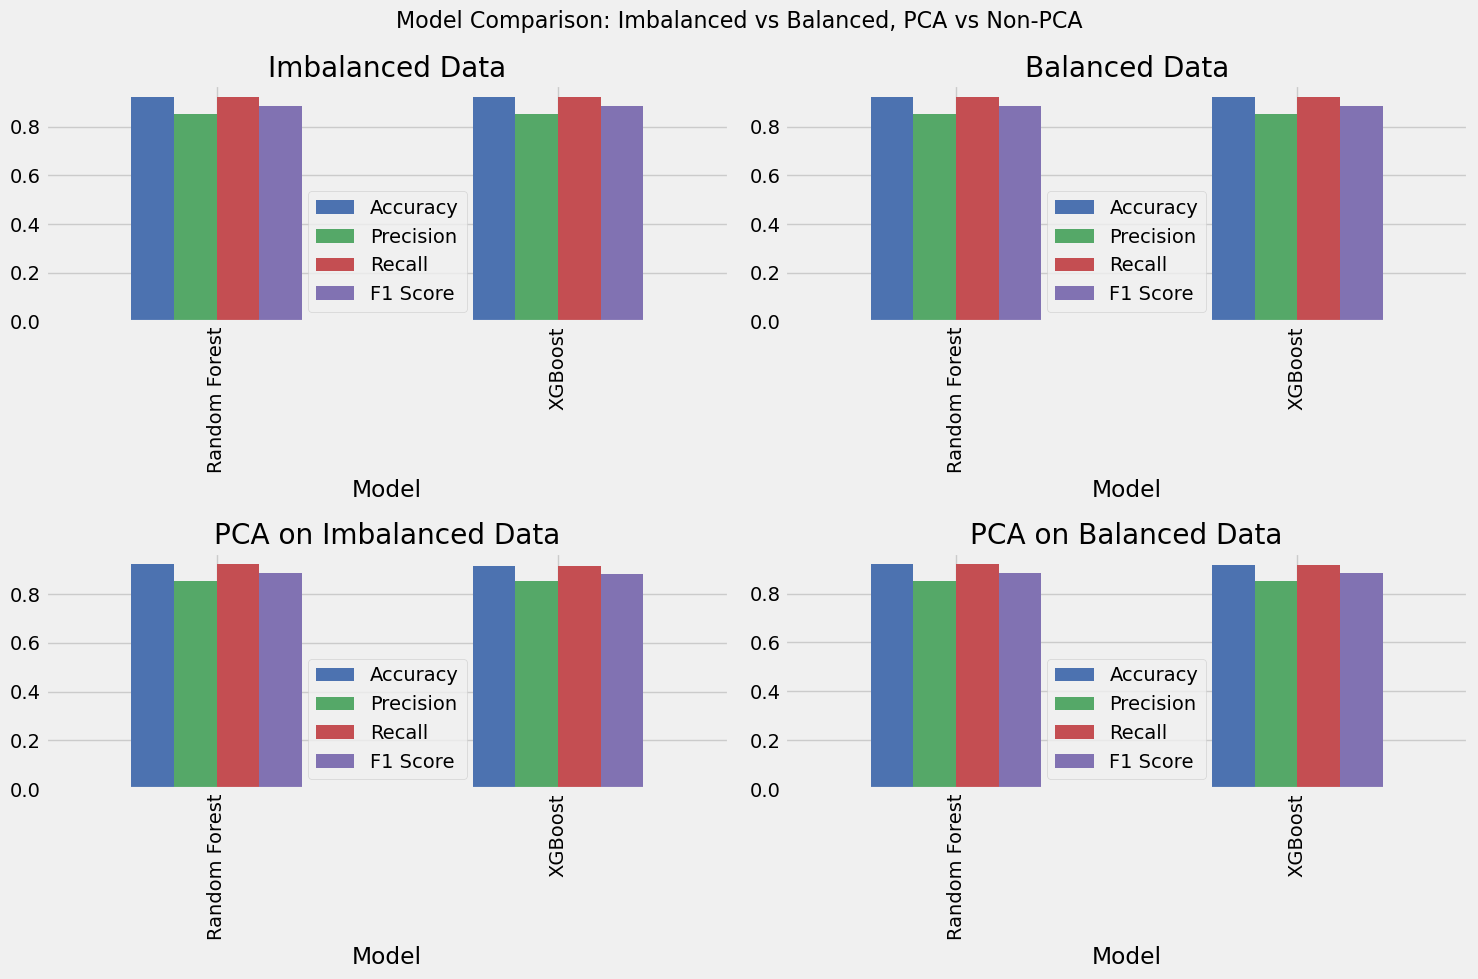

In [28]:
# Plot the results
model_comparison.plot_results()

In [29]:
# Display the results as a DataFrame
print(model_comparison.display_results())


           Model  Accuracy  Precision    Recall  F1 Score        Scenario
0  Random Forest  0.923567   0.852976  0.923567  0.886869      Imbalanced
1        XGBoost  0.923567   0.852976  0.923567  0.886869      Imbalanced
2  Random Forest  0.923567   0.852976  0.923567  0.886869        Balanced
3        XGBoost  0.920382   0.852750  0.920382  0.885276        Balanced
4  Random Forest  0.923567   0.852976  0.923567  0.886869  PCA Imbalanced
5        XGBoost  0.917197   0.852523  0.917197  0.883679  PCA Imbalanced
6  Random Forest  0.920382   0.852750  0.920382  0.885276    PCA Balanced
7        XGBoost  0.917197   0.852523  0.917197  0.883679    PCA Balanced


In [36]:
results = model_comparison.combined_results_df

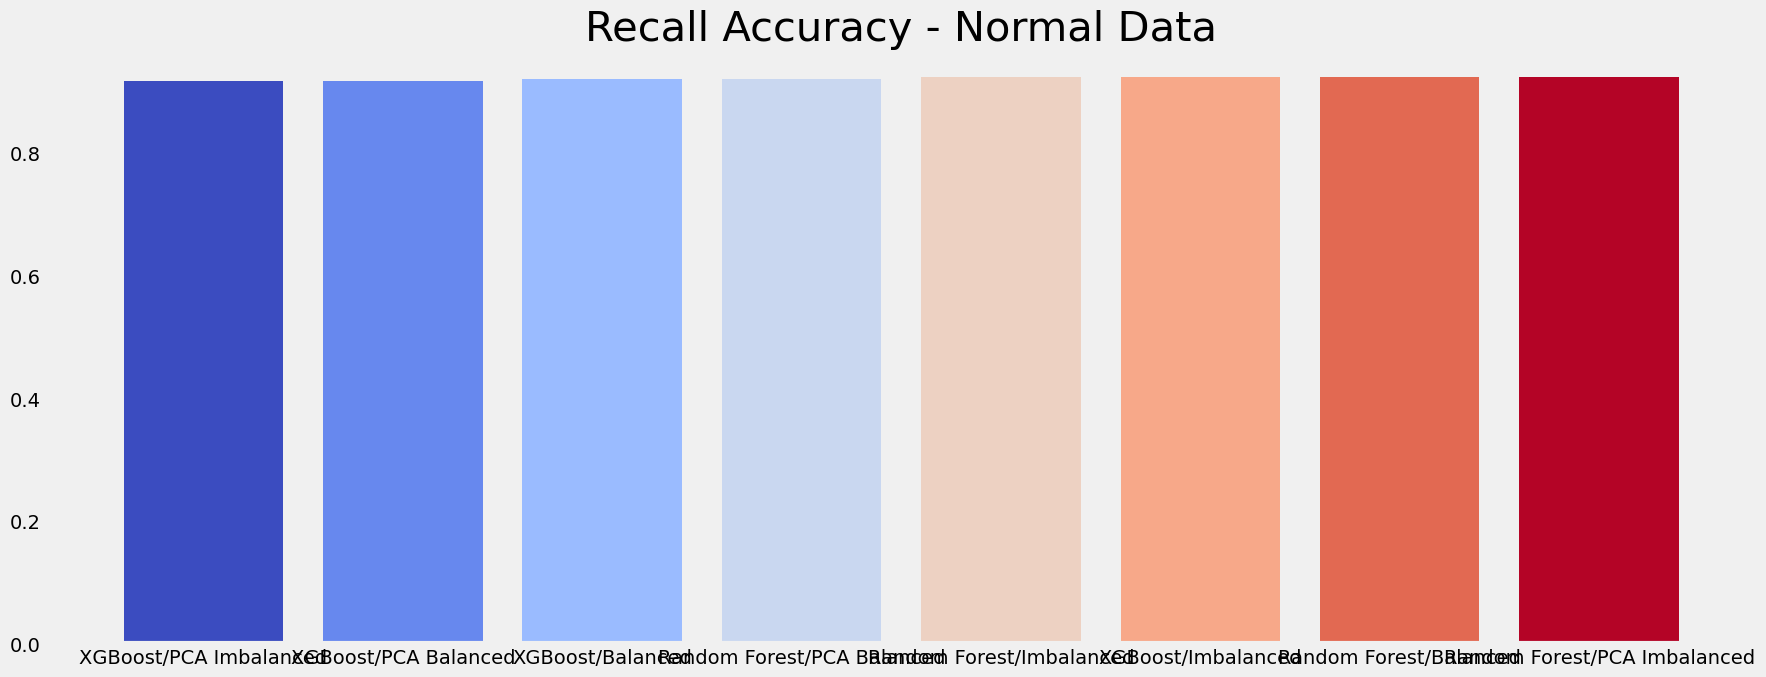

In [40]:
model_comparison.plot_specific_metric(
                    metric_name='Recall',
                    metric_values=results['Recall'],
                    model_labels=results['Model']+'/'+results['Scenario'],
                    title_suffix='Normal Data',
                )

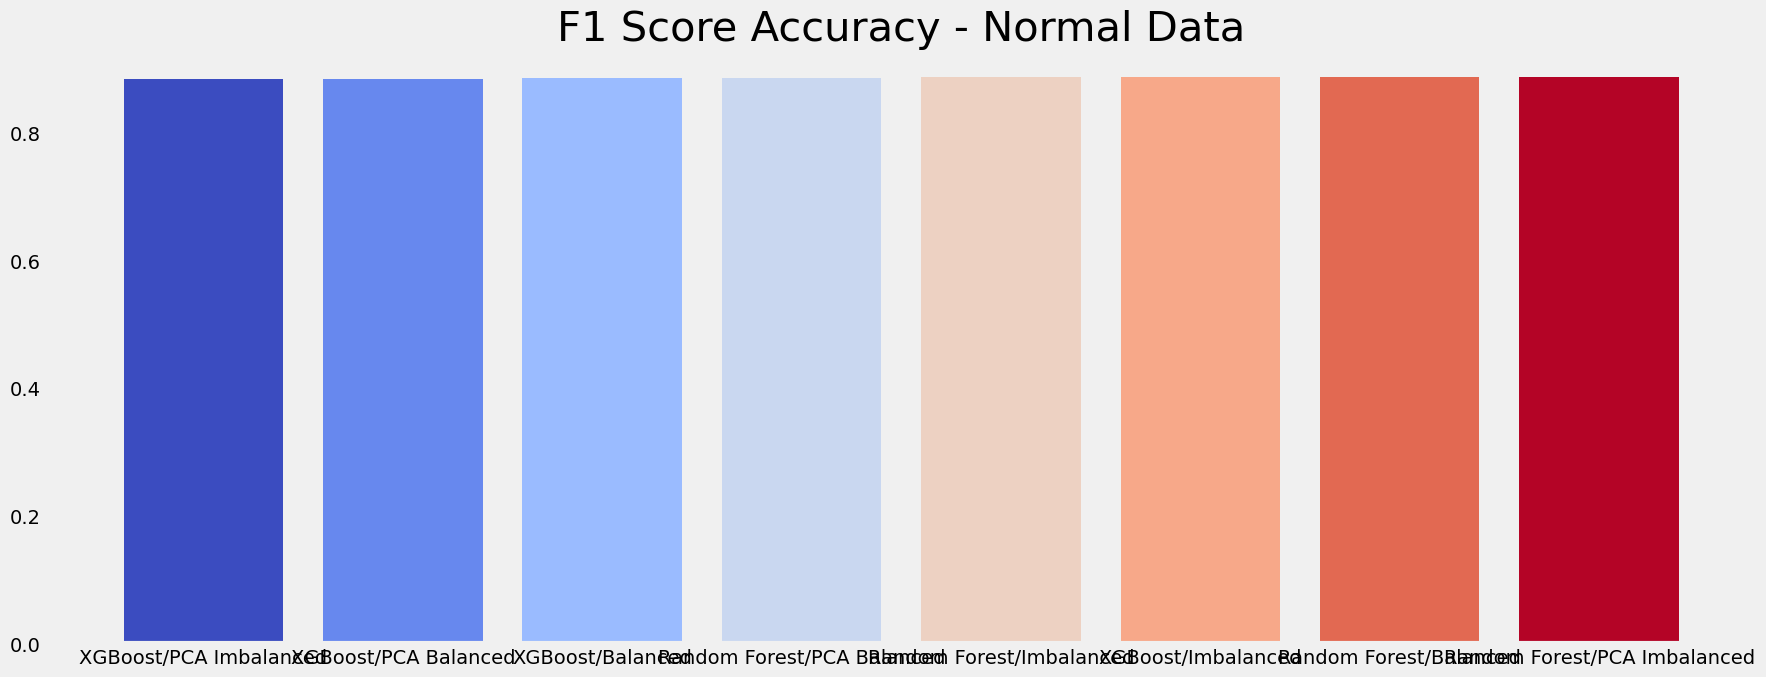

In [41]:
model_comparison.plot_specific_metric(
                    metric_name='F1 Score',
                    metric_values=results['F1 Score'],
                    model_labels=results['Model']+'/'+results['Scenario'],
                    title_suffix='Normal Data',
                )

---